In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's begin at the beginning and get a dataset - I'm going to use all NBA box score data from 2012-2018 for this exercise (dataset found via kaggle). The primary goal of this report is to attempt to determine what box score data can be correlated to the most important stat of any sport...winning!

In [2]:
df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-enhanced-stats\2012-18_teamBoxScore.csv')
off_df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-enhanced-stats\2012-18_officialBoxScore.csv')

Starting very simple - what happens when we first look over a scatter of average points scored vs average points against? This is going to be our starting point to evaluate overall points scored vs points against, and determine if there is any relation between those 2 variables.

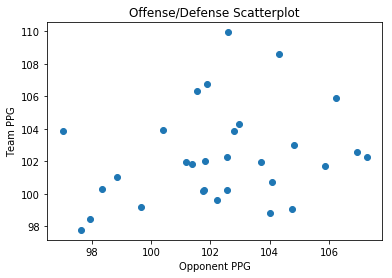

In [3]:
plt.scatter(x = df.groupby('teamAbbr')['opptPTS'].mean(), y = df.groupby('teamAbbr')['teamPTS'].mean())
plt.xlabel('Opponent PPG')
plt.ylabel('Team PPG')
plt.title('Offense/Defense Scatterplot')
plt.show()

This isn't very useful! There's no clear correlation between offensive and defensive success. Let's take this a step further and see if we can correlate winning to *net* PPG.

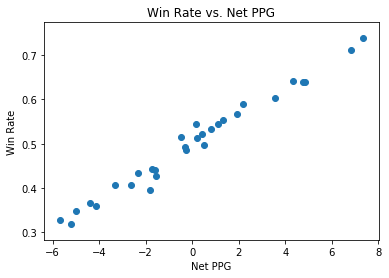

In [4]:
net_ppg = df.groupby('teamAbbr')['teamPTS'].mean() - df.groupby('teamAbbr')['opptPTS'].mean()
wins = df[df['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
losses = df[df['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
win_rate = wins / (wins + losses)
plt.scatter(x = net_ppg, y = win_rate)
plt.xlabel('Net PPG')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Net PPG')
plt.show()

Now we're starting to see something! This follows the intuition that outscoring opponents by more generally leads to more winning. Do any teams in particular stand out?

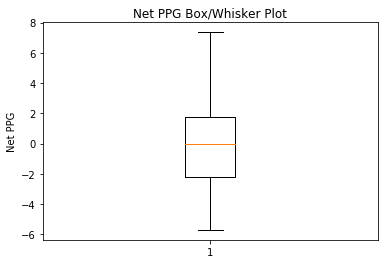

In [5]:
plt.boxplot(net_ppg)
plt.ylabel('Net PPG')
plt.title('Net PPG Box/Whisker Plot')
plt.show()

It doesn't appear that there are any particularly extreme outliers here - this makes sense given the large sample size of games (6 full seasons * 82 games per season per team). Let's at least see who our best and worst teams are...

In [6]:
print(net_ppg.sort_values())

teamAbbr
PHI   -5.699187
ORL   -5.193089
LAL   -4.995935
PHO   -4.398374
SAC   -4.138211
BKN   -3.321138
NY    -2.640244
MIL   -2.321138
MIN   -1.817073
NO    -1.727642
CHA   -1.575203
DET   -1.550813
CHI   -0.483740
DEN   -0.286585
DAL   -0.260163
MEM    0.166667
WAS    0.223577
ATL    0.443089
UTA    0.500000
BOS    0.818737
CLE    1.103659
POR    1.325203
IND    1.930754
MIA    2.201220
TOR    3.548780
HOU    4.319106
LAC    4.770325
OKC    4.863821
SA     6.839431
GS     7.359756
dtype: float64


Unsurprisingly, Golden State shows up as the best team and Philadelphia as the worst over this time frame (#TrustTheProcess). Let's delve into the differences between these 2 teams and see if we can't figure out other aspects that increase the likelihood of winning. What if we look at overall team stats from this time period?

In [7]:
basic_stats = df[['teamAbbr', 'teamPTS', 'teamAST', 'teamTO', 'teamSTL', 'teamBLK', 'teamPF', 'teamTRB']].groupby('teamAbbr').mean()
basic_stats.style.background_gradient(cmap='summer')

,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamTRB
teamAbbr,,,,,,,
ATL,101.809,24.6829,15.1118,8.4248,4.69512,18.6463,41.628
BKN,100.74,21.5935,14.9268,7.34756,4.36992,19.8089,42.3354
BOS,101.99,23.3625,14.1385,7.94094,4.20978,20.9735,42.8432
CHA,100.159,21.2581,12.502,6.73374,5.20528,17.8963,43.3516
CHI,99.1809,22.7053,14.1016,7.03659,5.03862,18.7967,45.0447
CLE,103.898,22.1159,13.9106,7.12195,3.94106,19.437,43.0874
DAL,102.287,22.4858,12.9004,7.66667,4.2561,19.752,41.3476
DEN,105.933,23.6199,14.9959,7.77846,5.04878,20.8882,45.1037
DET,100.244,21.1829,13.6606,7.44106,4.29065,19.063,44.7053


Surprisingly, Philadelphia does outperform Golden State in one aspect - they averaged more steals over these 6 seasons. Are steals not very well correlated to winning, then?

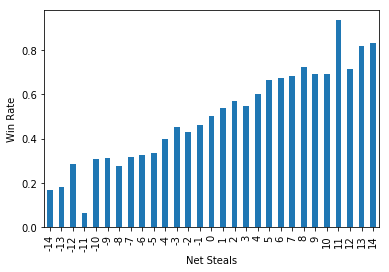

In [8]:
df['net_steals'] = df['teamSTL'] - df['opptSTL']
steals_wins = df[df['teamRslt'].str.contains("Win")].groupby('net_steals').size()
steals_losses = df[df['teamRslt'].str.contains("Loss")].groupby('net_steals').size()
steals_win_rate = steals_wins / (steals_wins + steals_losses)
steals_win_rate[2:-2].plot(kind = "bar")
# The first 2 and last 2 data points have been removed, there was only 1 game for those extreme net steal values.
plt.xlabel('Net Steals')
plt.ylabel('Win Rate')
plt.show()

It appears that steals *are* correlated with winning, but not enough to outweigh all the other aspects in which Golden State was superior to Philadelphia. For future study, it would be good to explore how strongly each statistic is correlated with winning, since despite being second in steals, Philadelphia was last in Net PPG. Additionally, the above chart only looks at *net* steals, while Philadelphia is second in *team* steals.

We've seen that some performance-based statistics are intuitively correlated to winning, but how about aspects that are outside of a team's control? Let's evaluate teams' performances with specific officials to see if any officials are more or less favorable to specific teams. First, find the referees who officiated the most games.

In [9]:
off_df['off'] = off_df['offFNm'] + ' ' + off_df['offLNm']
off_df.off.value_counts().head(5)

John Goble         808
Kane Fitzgerald    794
Zach Zarba         790
Scott Foster       786
Marc Davis         786
Name: off, dtype: int64

In [10]:
# First separate out the games by these officials
goble = off_df.loc[off_df['off'] == 'John Goble']
fitzgerald = off_df.loc[off_df['off'] == 'Kane Fitzgerald']
zarba = off_df.loc[off_df['off'] == 'Zach Zarba']
davis = off_df.loc[off_df['off'] == 'Marc Davis']
foster = off_df.loc[off_df['off'] == 'Scott Foster']

In [12]:
# Next, calculate win rate by team for each official
goble_wins = goble[goble['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
goble_losses = goble[goble['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
goble_win_rate = goble_wins / (goble_wins + goble_losses)
fitzgerald_wins = fitzgerald[fitzgerald['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
fitzgerald_losses = fitzgerald[fitzgerald['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
fitzgerald_win_rate = fitzgerald_wins / (fitzgerald_wins + fitzgerald_losses)
zarba_wins = zarba[zarba['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
zarba_losses = zarba[zarba['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
zarba_win_rate = zarba_wins / (zarba_wins + zarba_losses)
davis_wins = davis[davis['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
davis_losses = davis[davis['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
davis_win_rate = davis_wins / (davis_wins + davis_losses)
foster_wins = foster[foster['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
foster_losses = foster[foster['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
foster_win_rate = foster_wins / (foster_wins + foster_losses)

In [13]:
# Lastly, concatenate the results into one dataframe
overall_win_rate = pd.concat([win_rate, goble_win_rate, fitzgerald_win_rate, zarba_win_rate, davis_win_rate, foster_win_rate], axis=1)
overall_win_rate.columns = ['overall', 'Goble', 'Fitzgerald', 'Zarba', 'Davis', 'Foster']
print(overall_win_rate)

           overall     Goble  Fitzgerald     Zarba     Davis    Foster
teamAbbr                                                              
ATL       0.522358  0.607143    0.666667  0.566667  0.464286  0.384615
BKN       0.406504  0.518519    0.451613  0.379310  0.392857  0.346154
BOS       0.533605  0.615385    0.484848  0.517241  0.400000  0.500000
CHA       0.441057  0.441176    0.409091  0.566667  0.409091  0.592593
CHI       0.514228  0.608696    0.652174  0.454545  0.705882  0.625000
CLE       0.544715  0.520000    0.416667  0.571429  0.608696  0.500000
DAL       0.485772  0.533333    0.516129  0.458333  0.458333  0.416667
DEN       0.491870  0.666667    0.461538  0.714286  0.531250  0.370370
DET       0.426829  0.441176    0.478261  0.370370  0.333333  0.611111
GS        0.737805  0.800000    0.695652  0.636364  0.785714  0.757576
HOU       0.642276  0.466667    0.760000  0.645161  0.612903  0.760000
IND       0.566191  0.586207    0.562500  0.612903  0.592593  0.575758
LAC   

In [ ]:
for name in off_df.off.value_counts().head(5):
    dummy_df = off_df.loc[off_df['off'] == 'name']
    off_wins = dummy_df[dummy_df['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
    off_losses = dummy_df[dummy_df['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
    off_win_rate = off_wins / (off_wins + off_losses)
    print(off_win_rate)
    #overall_win_rate = pd.concat([win_rate, off_win_rate], axis=1, sort=True)